# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 12. Estimation of VAR-Model

In [1]:
# Importing the necessary python packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

%matplotlib inline

In [2]:
# Load in the previosuly prepared datasets
sample_1 = pd.read_csv("transformed_data_sample_1.csv", parse_dates=["date"], index_col="date")
sample_2 = pd.read_csv("transformed_data_sample_2.csv", parse_dates=["date"], index_col="date")
sample_full = pd.read_csv("transformed_data_sample_full.csv", parse_dates=["date"], index_col="date")

In [3]:
# Create a vector auto regressive model for all samples timeframes
model_1 = VAR(endog=sample_1[["hdax_pct", "new_cases_pct", "stringency_diff"]],
              exog=sample_1[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')
model_2 = VAR(endog=sample_2[["hdax_pct", "new_cases_pct", "stringency_diff"]],
              exog=sample_2[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')

model_full = VAR(endog=sample_full[["hdax_pct", "new_cases_pct", "stringency_diff"]],
              exog=sample_full[["Monday", "Tuesday", "Wednesday", "Thursday"]],
              missing='none')

/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maximbuz/Anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [4]:
# Show how many lags different information criterions suggest for first sample
model_1.select_order(trend='c').summary()

,AIC,BIC,FPE,HQIC
0,-6.085,-5.762*,0.002277,-5.954*
1,-6.088,-5.572,0.002271,-5.878
2,-6.012,-5.302,0.002451,-5.724
3,-6.038,-5.134,0.002393,-5.670
4,-5.943,-4.846,0.002634,-5.497
5,-5.945,-4.654,0.002635,-5.421
6,-6.147,-4.662,0.002161,-5.544
7,-6.236*,-4.558,0.001986*,-5.554
8,-6.148,-4.276,0.002182,-5.387
9,-6.082,-4.016,0.002347,-5.243


In [5]:
# Show how many lags different information criterions suggest for second sample
model_2.select_order(trend='c').summary()

,AIC,BIC,FPE,HQIC
0,-9.398,-9.125,8.293e-05,-9.287
1,-9.615*,-9.179*,6.672e-05*,-9.438*
2,-9.575,-8.976,6.947e-05,-9.332
3,-9.522,-8.759,7.332e-05,-9.212
4,-9.482,-8.557,7.632e-05,-9.107
5,-9.539,-8.450,7.220e-05,-9.097
6,-9.594,-8.342,6.844e-05,-9.086
7,-9.558,-8.142,7.109e-05,-8.984
8,-9.557,-7.978,7.136e-05,-8.916
9,-9.479,-7.736,7.744e-05,-8.772


In [6]:
# Show how many lags different information criterions suggest for full sample
model_full.select_order(trend='c').summary()

,AIC,BIC,FPE,HQIC
0,-8.169,-7.992*,0.0002833,-8.098*
1,-8.187*,-7.904,0.0002784*,-8.074
2,-8.137,-7.748,0.0002925,-7.982
3,-8.109,-7.614,0.0003009,-7.911
4,-8.087,-7.486,0.0003076,-7.847
5,-8.139,-7.432,0.0002922,-7.856
6,-8.141,-7.329,0.0002915,-7.817
7,-8.137,-7.218,0.0002929,-7.770
8,-8.101,-7.077,0.0003036,-7.692
9,-8.072,-6.941,0.0003129,-7.620


In [7]:
# Write a function to find a leg-lenght at which
# the portmonteau test's H0: "Absence of significant residual autocorrelations"
# is failed to be rejected, signifying a lag-structure suitable for VAR-estimations
    
def lags_whiteness(models_dict, significance = 0.05):
    result_list = []
    for key, model in models_dict.items():
        n = 1
        while True:
            results = model.fit(n)
            test = results.test_whiteness(nlags=84, signif=significance, adjusted=False)
            test_statistic = test.test_statistic
            critical_value = test.crit_value
            if test_statistic < critical_value:
                break
            n = n + 1
        result_list.append(key + ": No significant autocorrelation at " + str(n) + " lags.")
    return result_list

In [8]:
# For the three different samples, use the above function
models = {"Model_Sample_1": model_1, "Model_Sample_2": model_2, "Model_Sample_full": model_full}

lags_whiteness(models)


['Model_Sample_1: No significant autocorrelation at 1 lags.',
 'Model_Sample_2: No significant autocorrelation at 1 lags.',
 'Model_Sample_full: No significant autocorrelation at 5 lags.']

In [9]:
# Getting the result from the regression of the models
results_1 = model_1.fit(ic='aic')
results_2 = model_2.fit(ic='aic')
results_full = model_full.fit(5)

In [10]:
# Getting the summary of the results for the first sample period
results_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Aug, 2021
Time:                     19:34:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.75076
Nobs:                     141.000    HQIC:                  -4.71912
Log likelihood:          -142.781    FPE:                 0.00465790
AIC:                     -5.38199    Det(Omega_mle):      0.00280349
--------------------------------------------------------------------
Results for equation hdax_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.000568         0.004562           -0.124           0.901
Monday                     0.008895         0.006201            1.434           0.151
Tuesday                    0.007177  

In [11]:
# Getting the summary of the results for the second sample period
results_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Aug, 2021
Time:                     19:34:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.94589
Nobs:                     187.000    HQIC:                  -9.19255
Log likelihood:           103.190    FPE:                8.60635e-05
AIC:                     -9.36058    Det(Omega_mle):     7.58997e-05
--------------------------------------------------------------------
Results for equation hdax_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000153         0.001704            0.090           0.929
Monday                     0.002056         0.002381            0.864           0.388
Tuesday                    0.001936  

In [12]:
# Getting the summary of the results for the full sample period
results_full.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Aug, 2021
Time:                     19:34:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.37560
Nobs:                     331.000    HQIC:                  -6.78993
Log likelihood:          -179.780    FPE:                0.000855035
AIC:                     -7.06481    Det(Omega_mle):     0.000717045
--------------------------------------------------------------------
Results for equation hdax_pct
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.000208         0.002259           -0.092           0.926
Monday                     0.004456         0.003066            1.454           0.146
Tuesday                    0.003775  

## 12. Plotting of Results

### 12.1 Plotting Results for first sample timeframe

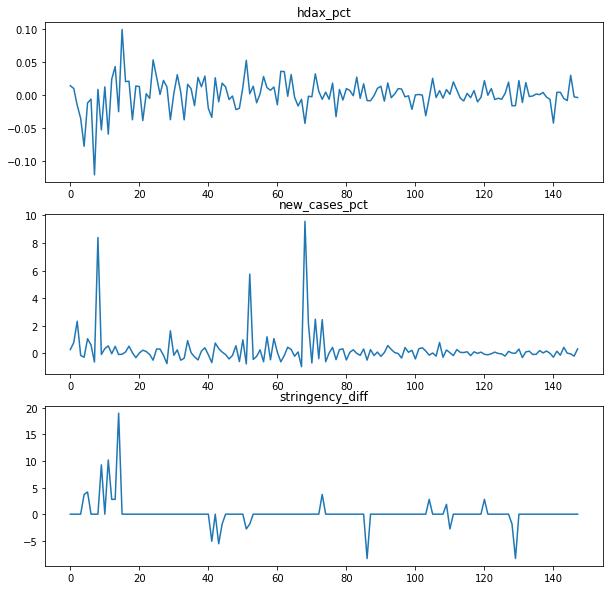

In [13]:
results_1_plot_timeseries = results_1.plot()

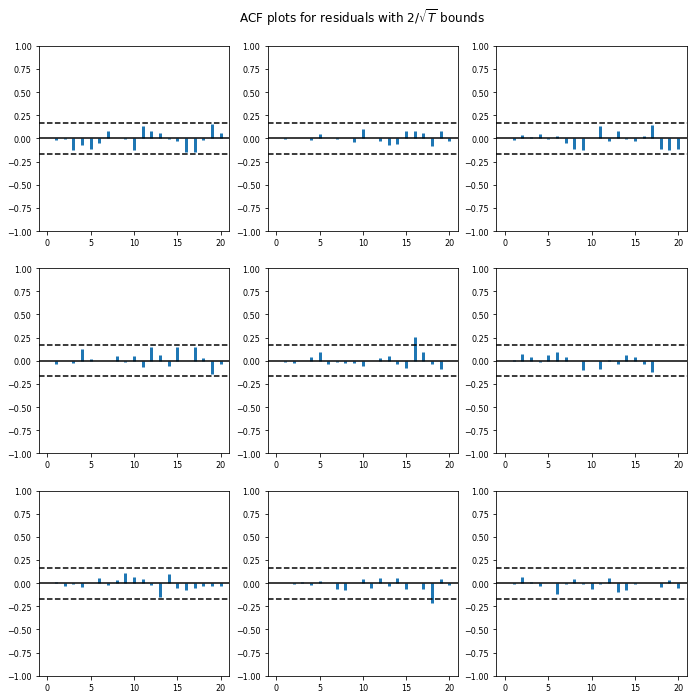

In [14]:
results_1_plot_acorr = results_1.plot_acorr(nlags=20, resid=True, linewidth=3)

### 12.2 Plotting Results for second sample timeframe

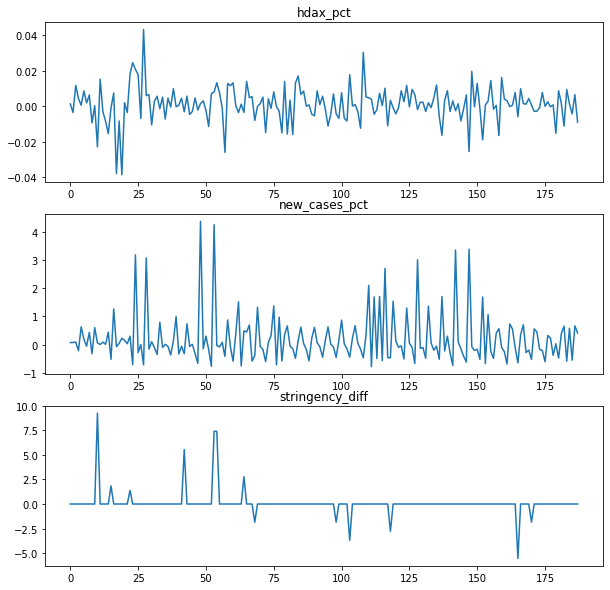

In [15]:
results_2_plot_timeseries = results_2.plot()

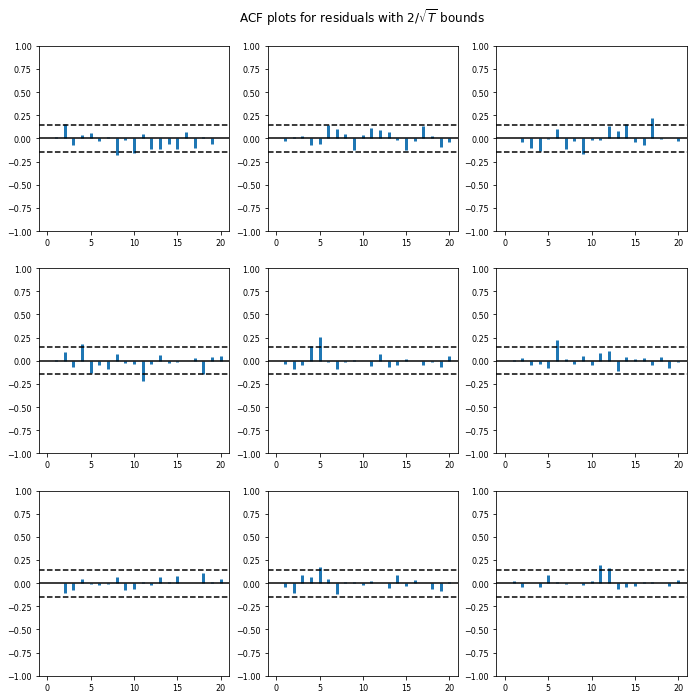

In [16]:
results_2_plot_acorr = results_2.plot_acorr(nlags=20, resid=True, linewidth=3)

### 12.3 Plotting Results for full sample timeframe

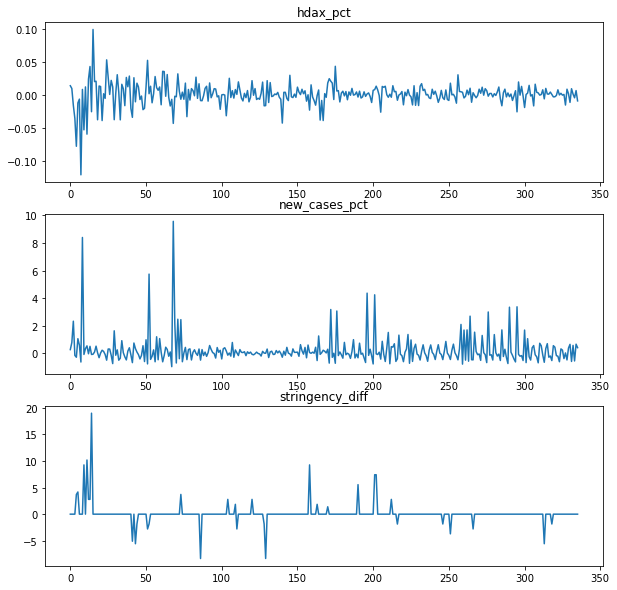

In [17]:
results_full_plot_timeseries = results_full.plot()

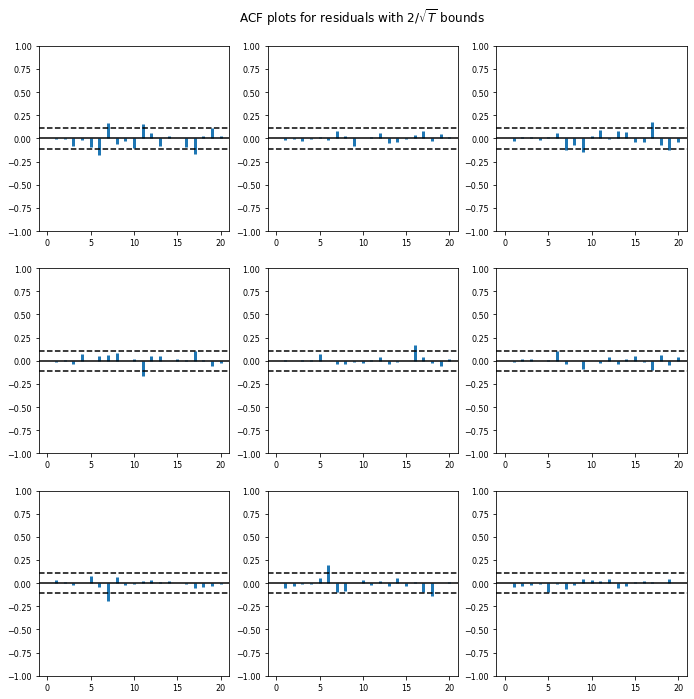

In [18]:
results_full_plot_acorr = results_full.plot_acorr(nlags=20, resid=True, linewidth=3)

## 13. Impulse Response Functions (IRP)

### 13.1 IRP for first sample timeframe

In [19]:
irf_1 = results_1.irf(15)

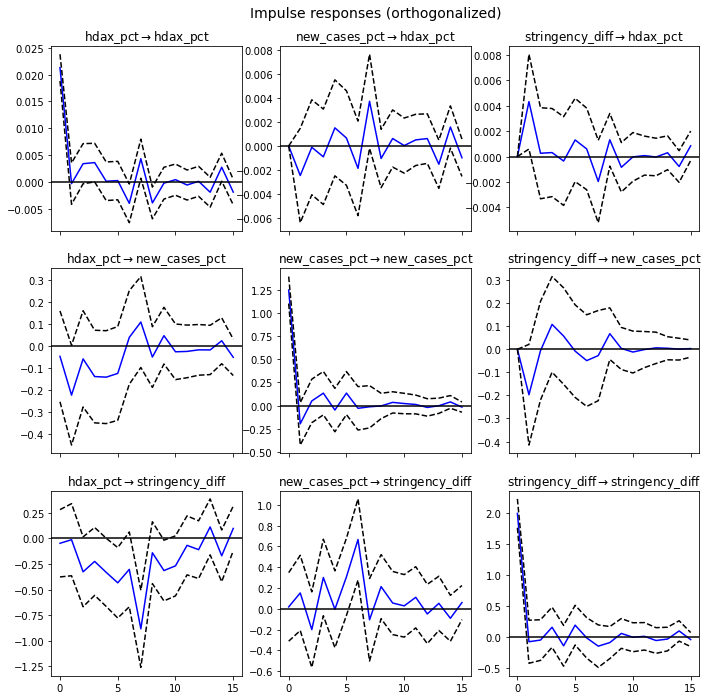

In [20]:
irf_1_plot = irf_1.plot(orth=True)

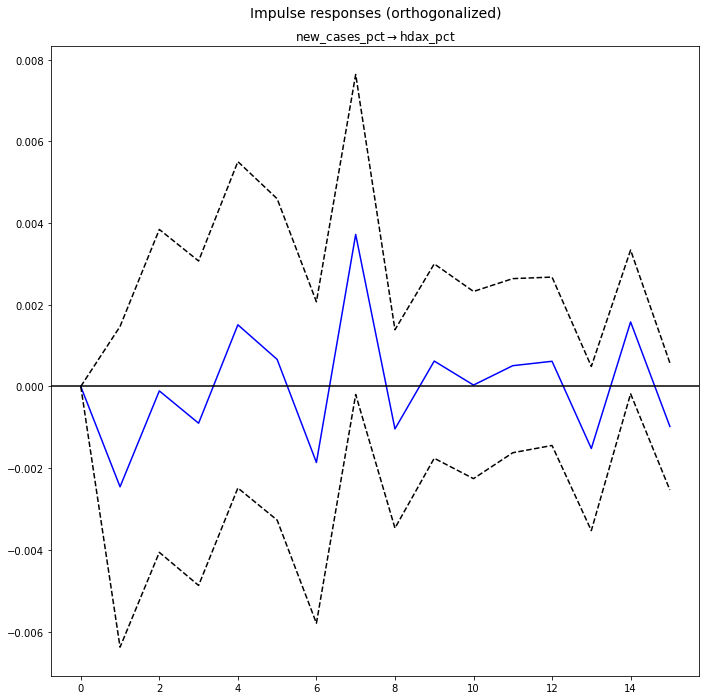

In [61]:
 irf_1_plot_new_cases = irf_1.plot(impulse='new_cases_pct',
                                   response="hdax_pct",
                                   orth=True)

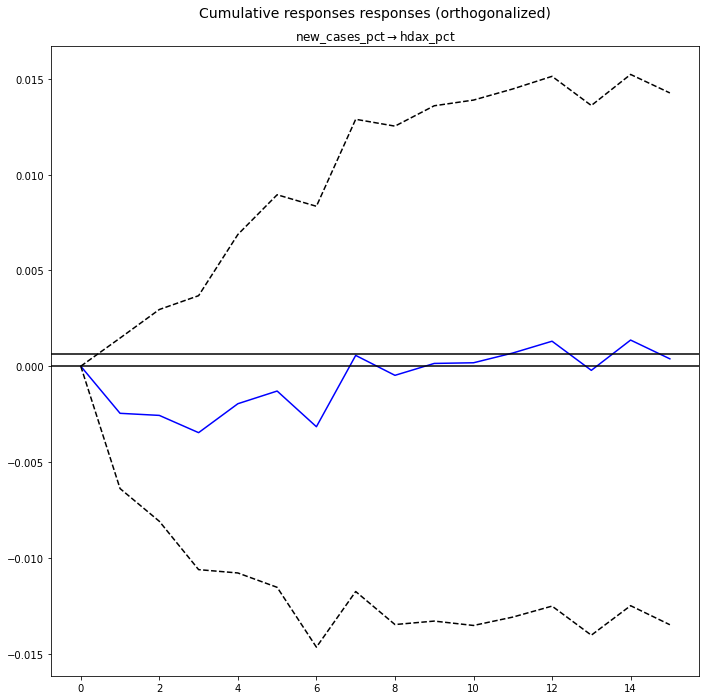

In [66]:
irf_1_plot_cumulative_cases = irf_1.plot_cum_effects(impulse='new_cases_pct',
                                                     response="hdax_pct",
                                                     orth=True)

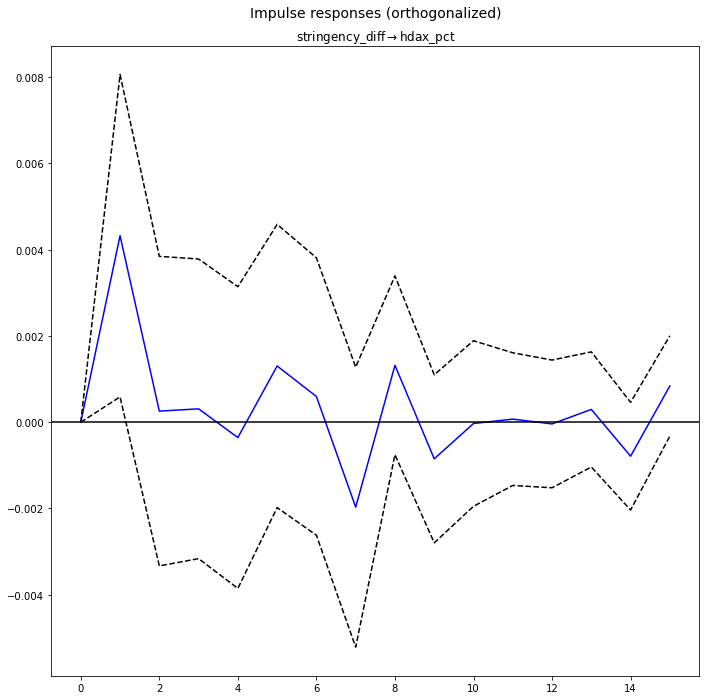

In [57]:
 irf_1_plot_stringency = irf_1.plot(impulse='stringency_diff',
                                    response="hdax_pct",
                                    orth=True)

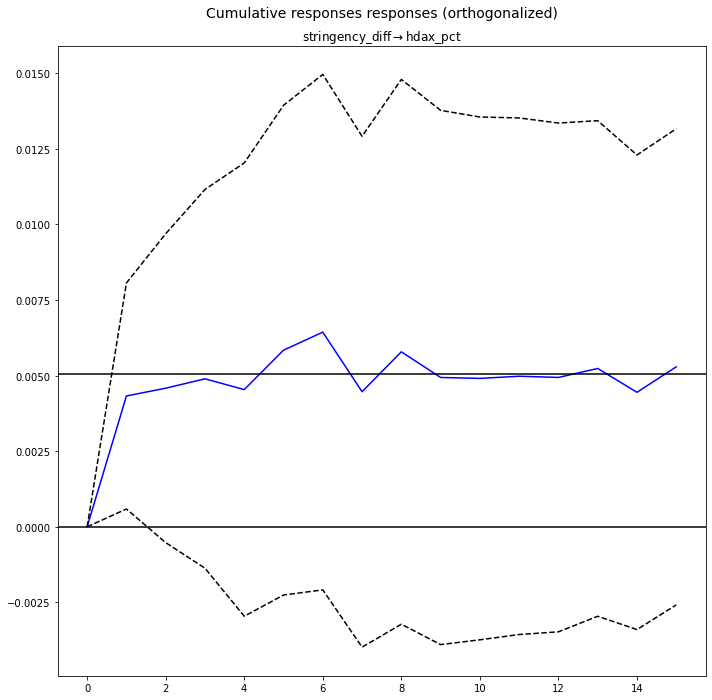

In [60]:
irf_1_plot_cumulative_stringency = irf_1.plot_cum_effects(impulse='stringeny_diff',
                                                          response="hdax_pct",
                                                          orth=True)

### 13.2 IRP for second sample timeframe

In [24]:
irf_2 = results_2.irf(6)

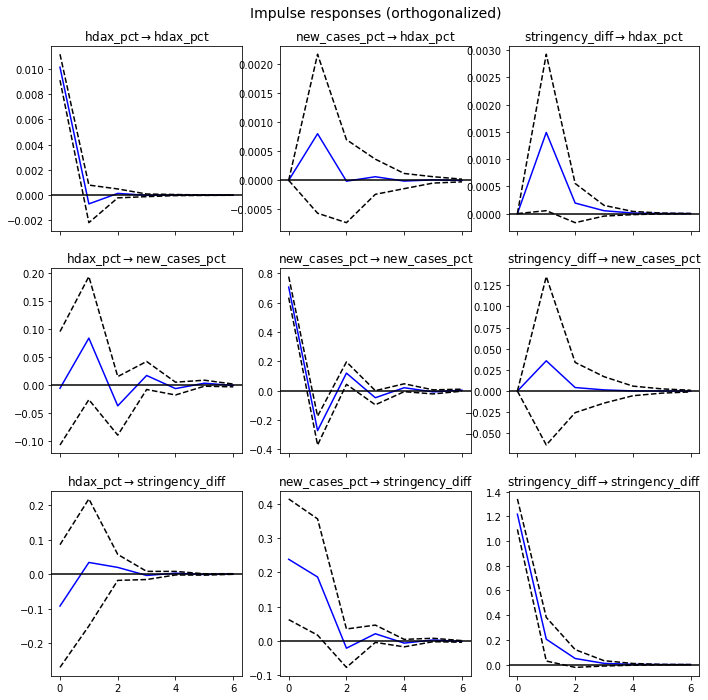

In [25]:
irf_2_plot = irf_2.plot(orth=True)

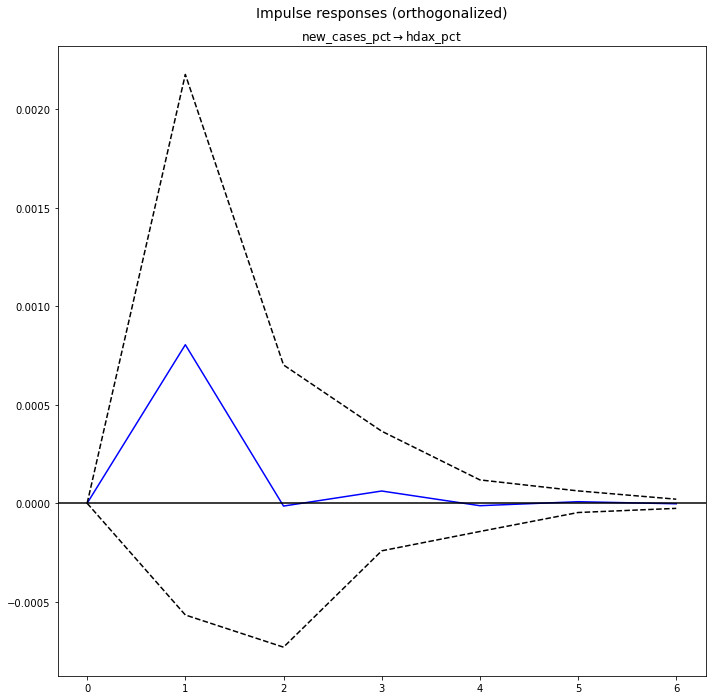

In [67]:
irf_2_plot_cases = irf_2.plot(impulse='new_cases_pct',
                                  response="hdax_pct",
                                  orth=True)

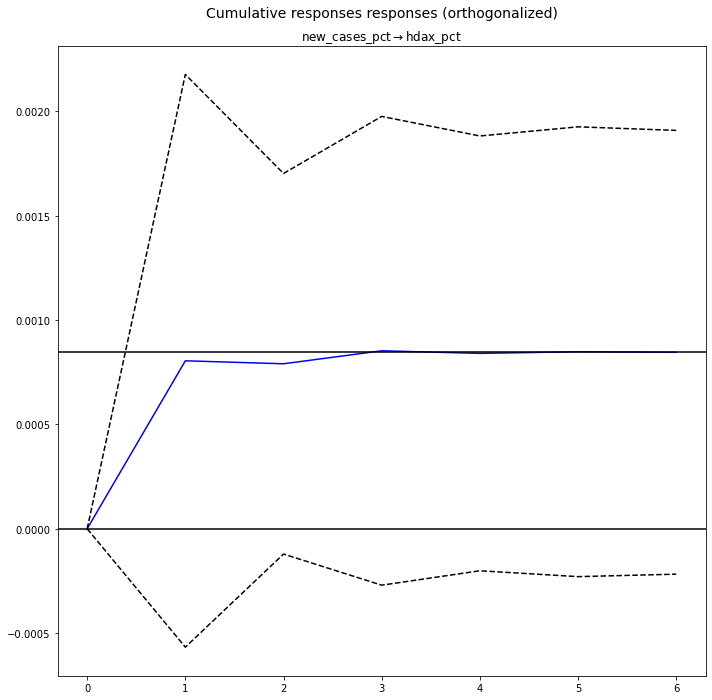

In [71]:
irf_2_plot_cumulative_cases = irf_2.plot_cum_effects(impulse='new_cases_pct', 
                                                     response="hdax_pct",
                                                     orth=True)

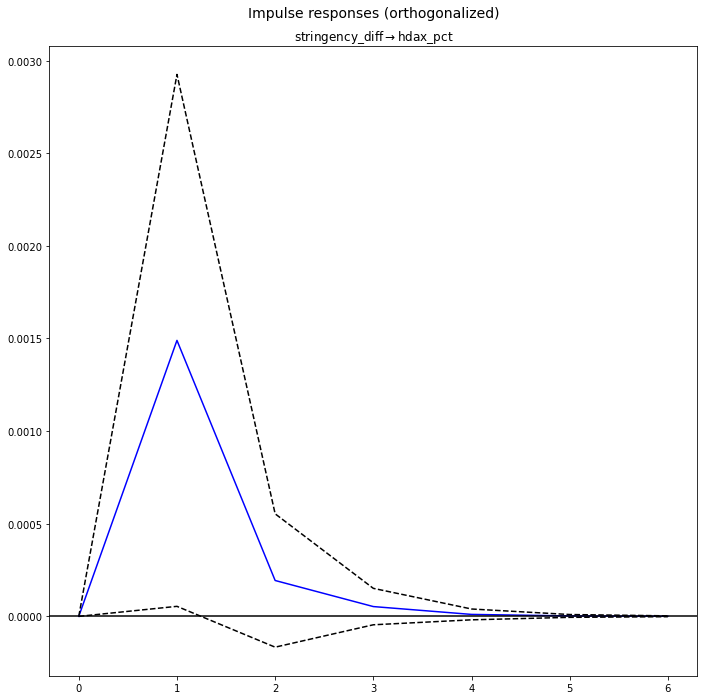

In [70]:
irf_2_plot_stringency = irf_2.plot(impulse='stringency_diff',
                                   response="hdax_pct",
                                   orth=True)

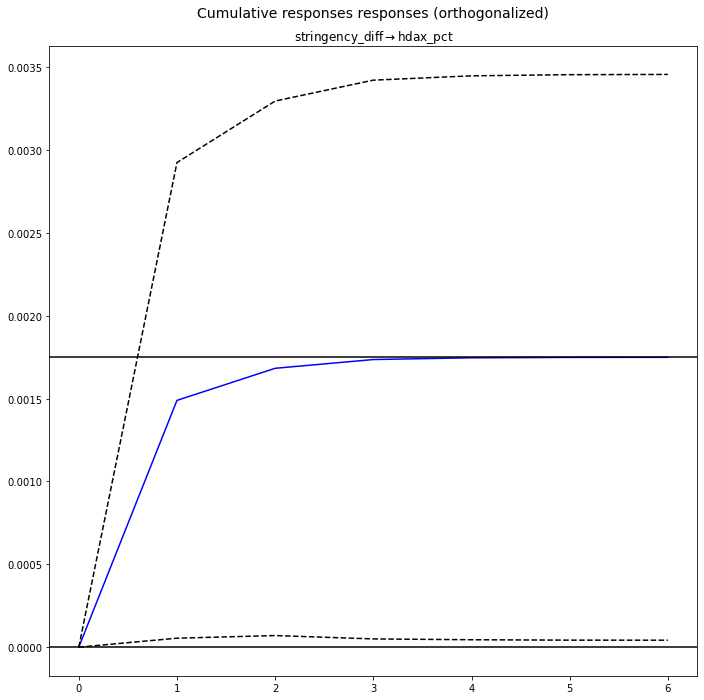

In [72]:
irf_2_plot_cumulative_stringency = irf_2.plot_cum_effects(impulse='stringency_diff', 
                                                     response="hdax_pct",
                                                     orth=True)

### 13.3 IRP for full sample timeframe

In [29]:
irf_full = results_full.irf(5)

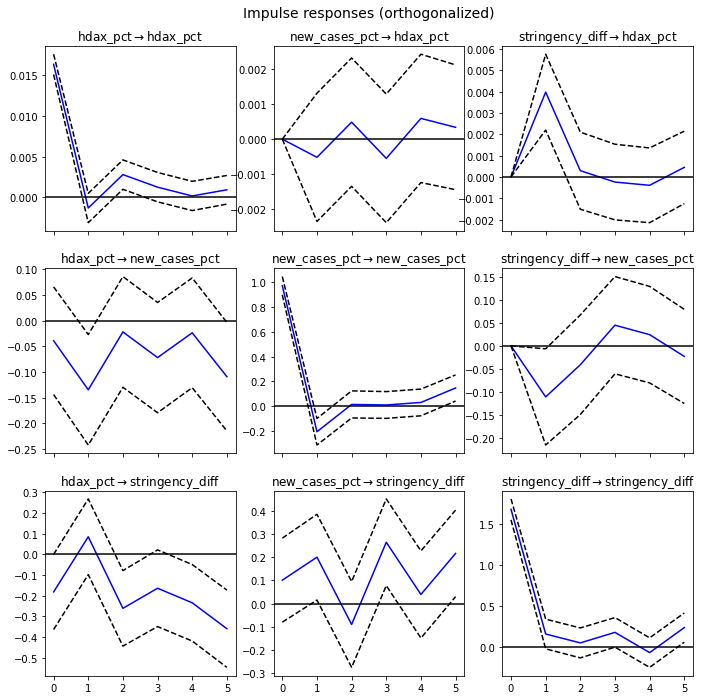

In [30]:
irf_full_plot = irf_full.plot(orth=True)

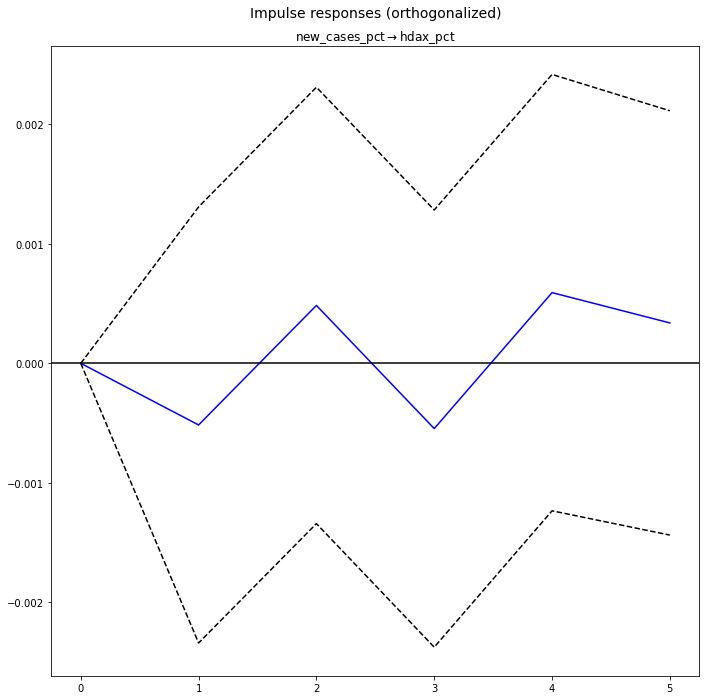

In [74]:
irf_full_plot_cases = irf_full.plot(impulse='new_cases_pct',
                                        response="hdax_pct",
                                        orth=True)

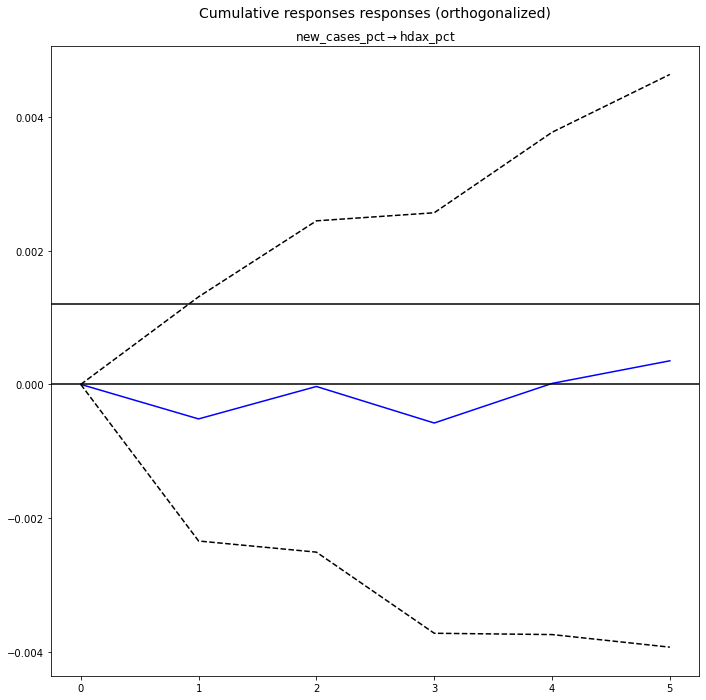

In [76]:
irf_full_plot_cumulative_cases = irf_full.plot_cum_effects(impulse='new_cases_pct',
                                                     response="hdax_pct",
                                                     orth=True)

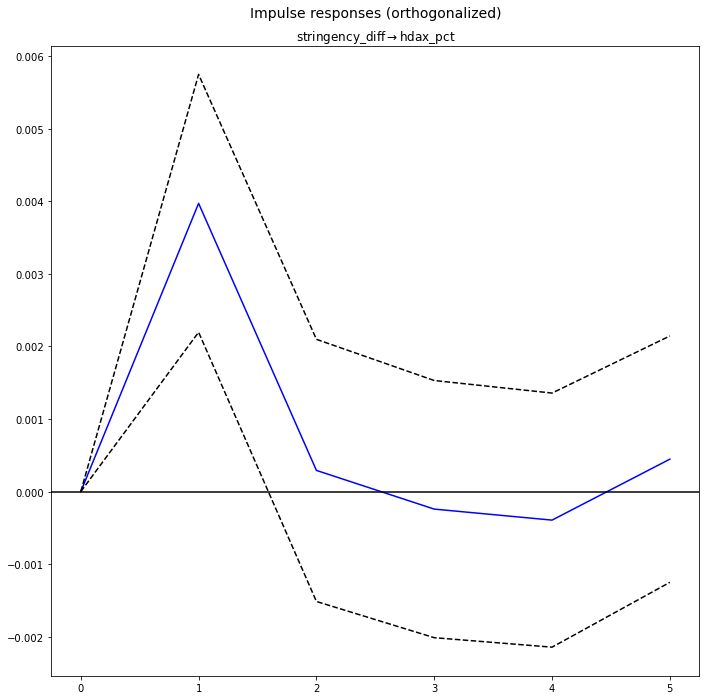

In [75]:
irf_full_plot_stringency = irf_full.plot(impulse='stringency_diff',
                                        response="hdax_pct",
                                        orth=True)

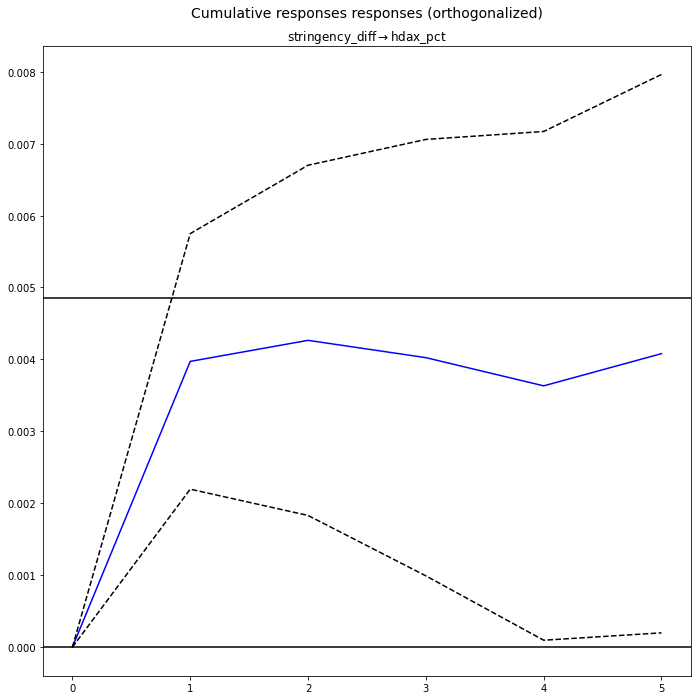

In [77]:
irf_full_plot_cumulative_stringency = irf_full.plot_cum_effects(impulse='stringency_diff',
                                                                response="hdax_pct",
                                                                orth=True)

## 14. Statistical Tests

### 14.1 Granger Causality Tests

* H0: “the causing variables do not Granger-cause the remaining variables of the system”
* H1: “the causing variables is Granger-causal for the remaining variables”

### 14.1.1 Granger Causality tests for first sample

In [34]:
#Testing block exogenity of new cases and stringency on stock returns
causality_1_block = results_1.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_1_cases = results_1.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_1_stringency = results_1.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [35]:
causality_1_block.summary()

Test statistic,Critical value,p-value,df
1.019,1.721,0.433,"(14, 345)"


In [36]:
causality_1_cases.summary()

Test statistic,Critical value,p-value,df
5.383,14.07,0.613,7


In [37]:
causality_1_stringency.summary()

Test statistic,Critical value,p-value,df
7.927,14.07,0.339,7


### 14.1.2 Granger Causality tests for second sample

In [38]:
#Testing block exogenity of new cases and stringency on stock returns
causality_2_block = results_2.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_2_cases = results_2.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_2_stringency = results_2.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [39]:
causality_2_block.summary()

Test statistic,Critical value,p-value,df
2.593,3.013,0.076,"(2, 537)"


In [40]:
causality_2_cases.summary()

Test statistic,Critical value,p-value,df
0.5470,3.841,0.460,1


In [41]:
causality_2_stringency.summary()

Test statistic,Critical value,p-value,df
4.183,3.841,0.041,1


### 14.1.3 Granger Causality tests for full sample

In [42]:
#Testing block exogenity of new cases and stringency on stock returns
causality_full_block = results_full.test_causality('hdax_pct', ['new_cases_pct', 'stringency_diff'], kind='f', signif=0.05)

#Testing granger causality of cases on stock returns
causality_full_cases = results_full.test_causality('hdax_pct', 'new_cases_pct', kind='wald', signif=0.05)

#Testing granger causality of stringency on stock returns
causality_full_stringency = results_full.test_causality('hdax_pct', 'stringency_diff', kind='wald', signif=0.05)

In [43]:
causality_full_block.summary()

Test statistic,Critical value,p-value,df
2.288,1.841,0.012,"(10, 933)"


In [44]:
causality_full_cases.summary()

Test statistic,Critical value,p-value,df
0.9376,11.07,0.967,5


In [45]:
causality_full_stringency.summary()

Test statistic,Critical value,p-value,df
21.65,11.07,0.001,5


### 14.2 Normality Tests

* H0: “The standardized residuals follow a normal distribution”
* H1: “The standardized residuals do not follow a normal distribution”

In [46]:
#Testing normality of first sample
normality_1 = results_1.test_normality()

#Testing normality of second sample
normality_2 = results_2.test_normality()

#Testing normality of full sample
normality_full = results_full.test_normality()

In [47]:
normality_1.summary()

Test statistic,Critical value,p-value,df
5504.,12.59,0.000,6


In [48]:
normality_2.summary()

Test statistic,Critical value,p-value,df
5213.,12.59,0.000,6


In [49]:
normality_full.summary()

Test statistic,Critical value,p-value,df
2.355e+04,12.59,0.000,6


### 14.3 Residual Autocorrelation Tests

* H0: "The timeseries are white noise (absence of significant residual autocorrelations)"
* H1: "The timeseries are not white noise (presence of significant residual autocorrelations)"

In [50]:
#Testing for residual autocorrelation in the first sample
whiteness_1 = results_1.test_whiteness(nlags=35, signif=0.05, adjusted=False)

#Testing for residual autocorrelation in the second sample
whiteness_2 = results_2.test_whiteness(nlags=47, signif=0.05, adjusted=False)

#Testing for residual autocorrelation in the full sample
whiteness_full = results_full.test_whiteness(nlags=84, signif=0.05, adjusted=False)

In [51]:
whiteness_1.summary()

Test statistic,Critical value,p-value,df
217.6,290.0,0.943,252


In [52]:
whiteness_2.summary()

Test statistic,Critical value,p-value,df
422.0,462.4,0.382,414


In [53]:
whiteness_full.summary()

Test statistic,Critical value,p-value,df
753.5,774.1,0.131,711


In [54]:
whiteness_full.crit_value

774.142515024226